<a href="https://colab.research.google.com/github/kellykwcao/CAS-Common-Chemistry-Python-Guide/blob/main/CAS_python_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the CAS Common Chemistry Python Acitivity! In this activity, you will learn to access Common Chemistry using its API. You will be able to automate the task of looking up information for many chemicals. With the power of APIs, a time-consuming task to do by hand can be completed with the click of a button! To begin, make a copy of this google colab notebook to your google drive.

**Before we begin, what are API’s?**
You might hear the term API used in cheminformatics and informatics research, but what is it? Not to be confused with active pharmaceutical ingredients (API in a pharmaceutical context), an API in computer science stands for application programming interface. Let’s talk about what an interface is first. We are constantly interacting with interfaces when we are driving, turning the volume up on our TV with a remote, or clicking on the YouTube video we want to watch.
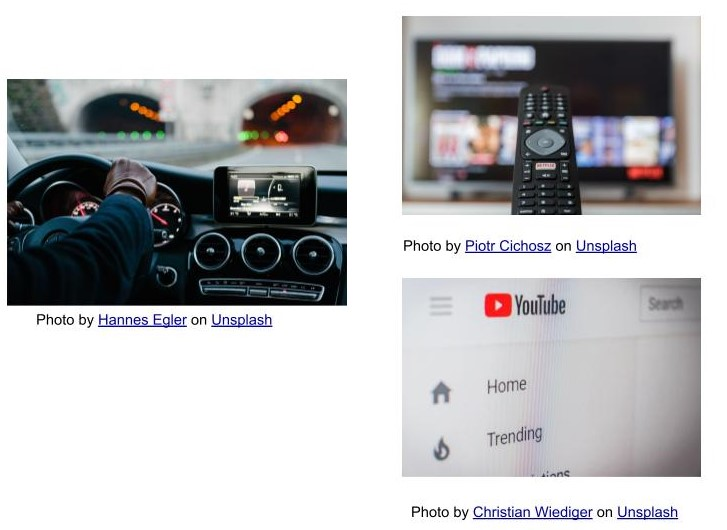 \\
We do not need to understand the inner workings of a car, TV, or website to be able to interact with these objects and get them to do what we want. An interface hides away the complexity of these objects giving us the power to interact with them.
Returning to the application programming interface, API allows connection between computers or between computer programs. A program can make a request to another one and get a response back. An example where APIs are used is in travel booking sites. APIs collect flight and hotel availability from providers and show you the cheapest option. Without APIs, the booking service would have to manually email each hotel and each airline to find their availability and then compare the costs and confirm with the traveller.
Discussion Question:
Can you think of a time you noticed two different computer programs talking to each other?

Bonus:
Google [your example] + “API developer documentation}, ex. “Spotify API developer documentation” to get an idea of what the API actually does.
https://developer.spotify.com/documentation/web-api/


In [ ]:
#1
"""
Click the button on the left with the triangle to run the code in a given cell
The code in this cell imports packages that will become useful later in the activity
"""
import requests
import json

2. Clicking the run button for the cell below will reveal a button for uploading a file to this notebook.

In [ ]:
#2 continued
"""
Please upload common_pharmaceuticals.txt to this colab notebook
"""
from google.colab import files
uploaded = files.upload()

Saving common_pharmaceuticals.txt to common_pharmaceuticals (1).txt


3. In the line of code below, the equals sign indicate the creation of a variable. On the left side is the name of the variable, pharmaceuticals. On the right side, the text file we uploaded is being read and the drug names are stored into a list.


In [ ]:
#3 continued

pharmaceuticals = uploaded['common_pharmaceuticals.txt'].decode("utf-8").split("\r\n")

"""
Check if the drug names have been loaded into the variable pharmaceuticals,
uncomment and run print(pharmaceuticals) by removing #.
"""

#print(pharmaceuticals)

4. Define a function in the cell below that will take in 3 string arguments and output a URL as a string. URLs stand for Uniform Resource Locator, an address on the web. In the coming steps, URLs will help us locate information when we request about the drug molecules on the suspect list. URLs take similar structure and can be divided into the base URL, endpoint, query type, and query:

Base URL | Endpoint | Query Type | Query
--- | --- | --- | ---
https://commonchemistry.cas.org/api | /detail |?cas\_rn | =50-00-0
https://commonchemistry.cas.org/api | /search |    ?q   | =formaldehyde
https://commonchemistry.cas.org/api | /detail |   ?uri  |  =CC


The base URL remains unchanged for accessing CAS Common Chemistry. As for the endpts, there are three in total, /detail, /search, and /export. For most use cases, /detail and /search are all we need. We will go over the difference between these two endpoints in more detail later. The query type can be cas_rn, q, or uri. In later steps, we will learn how to select between these three choices. The final part of the request URL is the query. It is similar to what we would enter in the search bar.

In [ ]:
#4 continued
"""
Edit the function below to create request urls.
This function should take in 3 string arguments:
endpt (search or detail)
query_type (q, cas_rn or uri)
query (eg. 50-00-0, caffeine)
and should return the url as a string
"""

def create_urls(endpt, query_type, query):
    base = "https://commonchemistry.cas.org/api"
    url =  "?" + "="
    return url


5. To check if the function works,
try to print out

*   create_urls('/detail', 'cas_rn', '50-00-0')
*   create_urls('/search', 'q', 'formaldehyde')
*   create_urls('/detail', 'uri', 'CC')

and see if they match the URLs

*   https://commonchemistry.cas.org/api/detail?cas_rn=50-00-0
*   https://commonchemistry.cas.org/api/search?q=formaldehyde
*   https://commonchemistry.cas.org/api/detail?uri=CC









In [ ]:
#5 continued

print('the url is:')
print(create_urls('/detail', 'cas_rn', '50-00-0'))

6
Before we get to looking up information for many chemicals
using CAS Common Chemistry's API,
let's make sure we can perform this task for a single molecule. We will use atorvastatin as an example.
Begin by creating a request URL. Use '/search' for the endpoint, 'q' for the query type, and the drug name for the query. Store the URL you have created in a variable called url.


In [ ]:
#6 continued

"""
Check if the url you have created follows the structure of urls in previous examples
by printing the variable url
"""

url = "create your url here"

print('the url is:')
print('upadate this print statement to print out the url')

7. We can now make a request with the url using the get() method from Python's requests package we imported in the beginning. Printing response out allows us to see if our request is successful. 200 indicates that the request is successful while 400 indicates a failed request. If the request did not go through, check if your url has extra symbols like slashes or missing symbols like the question mark or equals sign.  

In [ ]:
#7 continued

response = requests.get(url)

print('the status of our response:')
print(response)

<Response [400]>


8. Congratulations on making a successful request to CAS Common Chemistry's API! Let's take a look at the contents of the response by printing out response.text. \\


In [ ]:
#8 continued

print('The contents of our response:')
#print(response.text)

The contents of our response:
hi


8 continued \\
Though the text we got looks like a lot of gibberish, we can make out some information like the rn or CAS registry number, or the name of the drug molecule we searched. We also see the value of count is one. This is an indication that one molecule in the database matched the name of our drug molecule. Unfortunately, it seems like the more detailed information about atorvastatin such as the canonical SMILES is unavailable. \\

Based on the content of the response, can you make a guess about what the /search endpoint might do?

9. The response is in JSON format which we can convert to a Python dictionary to extract information using the loads() method from the json package we imported in the beginning. To check if the data type conversion was successful, we will check response.text's data type and search_response's data type using the type() method and printing out the results.

In [ ]:
#9 continued

search_response = json.loads(response.text)

#print('The response is of type:')
#print(type(response.text))

#print('We converted it to search_response and it is of type:')
#print(type(search_response))

NameError: ignored

10. Now that we have the contents of the response stored in the search_response variable as a dictionary, we can retrieve information such as the CAS registry number.

In [ ]:
#10 continued

"""
The CAS registry number is within the results section,
we can use square brackets [] to retrieve the results section
"""

results_section = search_response['results']


"""
results_section is a variable we created in the previous line of code,
let's check its type and content
"""
print('results_section is of type:')
#write a print statement here

print('the length of results_section is:')
print(len(results_section))


print('results_section is:')
#write a print statement here that prints what the results_section gets

In [ ]:
#10 continued

"""
We see results_section is a list of length 1.
Only 1 molecule matched the name atorvastatin in the database

Let's retrieve the first and only item from the list results_section
and store it the variable results_for_atorvastatin.

Note that the first item has an index of 0.
"""
results_for_atorvastatin = results_section[0]



"""
We will also print out the data type for results_for_atorvastatin
and its content below
"""
print('results_for_atorvastatin is of type:')
#write a print statement here

print('results_for_atorvastatin is:')
#write a print statement here


In [ ]:
#10 continued

"""
We are very close to the CAS registry number now!
Let's retrieve the registry number from the dictionary called
results_for_atorvastatin
"""

cas_rn = results_for_atorvastatin['rn']


"""
Finally let's print out the type and content of cas_rn
to check if we did succeed in retrieving the registry number
"""
print('cas_rn is of type:')
#write a print statement here

print('cas_rn is:')
#write a print statement here


In [ ]:
#10 continued

"""
Python allows us to combine all of these steps into one line of code!
Print out cas_rn_2 to see if it is equivalent to cas_rn
"""

cas_rn_2 = search_response['results'][0]['rn']

print('cas_rn_2 is:')
#write a print statement here

11. Awesome job getting through the process of retrieving the CAS registry number. Now that we have a CAS registry number that identifies a molecule without any ambiguity, we can use the /detail endpoint to get more information about the specific molecule we are interested in. Refer back to steps 6-8 if you get stuck. \\

Taking a closer look at the contents of the response from using the /detail content, can you identify some differences between /detail and /search?

In [ ]:
#11 continued

"""
Using the function create_urls(endpt, query_type, query),
create a url with the endpt being '/detail', the query_type being 'cas_rn',
and the query being cas_rn
"""


url = 'create a request url'
print('the url is:')
#write a print statement here

"""
Make a request with the url using the requests.get() method
and print its status code and contents
"""

response = 'call requests.get() here'
print('the status of the response:')
#write a print statement here

12. The response of our request is also in JSON form. We will convert it into a python dictionary again so we can work with it in Python. This step is analogous to step 9.

In [ ]:
#12 continued

"""
Call json.loads() method to convert
response to a dictionary called detail_response
"""

detail_response = 'convert JSON response to dictionary'
print('detail_response is:')
#write a print statement here

"""
check the type of response and detail_response
to see if the conversion was successful
"""
print('response is of type:')
#write a print statement here

print('detail_response is of type:')
#write a print statement here


13. Let's extract information from the dictionary called detail_response using the square brackets. The values we are interested in are associated with 'canonicalSmile', 'inchi', and 'inchiKey' and store these values in their respective variables.

In [ ]:
#13 continued

canonicalSmile = detail_response['canonicalSmile']
inchi = 'retrieve the inchi from detail_response'
inchiKey = 'retrieve the inchiKey from detail_response'

"""
print out the variables above to check if information
has been successfully retrieved
"""
print('canonicalSmile is:')
#write a print statement here

print('inchi is:')
#write a print statement here

print('inchiKey is:')
#write a print statement here

NameError: ignored

In [ ]:
#14

"""
The line of code below writes the information we
retrieved about the drug from interacting with CAS Common Chemistry's
API into a text file.
Then, the text file is downloaded onto your computer in a file called
suspect_list.txt
"""

with open('suspect_list.txt', 'w') as suspect_list:
    suspect_list.write('{} {} {} {} {}'.format('atorvastatin', cas_rn, canonicalSmile, inchi, inchiKey))

files.download('suspect_list.txt')

Awesome job! You have used CAS Common Chemistry's API to retrieve information about the drug atorvastatin. Before moving on to retrieving information for the many drug molecules on our list, let's first review the differences between /search and /detail endpoints.

--- | /search | /detail
--- | --- | --- |
query type accepted in url| ?q | ?cas_rn or ?uri
types of chemical data accepted | canonical SMILES, InChi, Inchikey and name | cas_rn or uri that identifies the exact molecule
response | number of hits (count), name, cas_rn and image of each hit | cas_rn, name, image, Inchi, InchiKey...

In summary, the /search endpoint is like casting a wide net to find all the molecules that match our query. The /detail endpoint is like using a tweezer to pick out specific information about a molecule of interest. Notice that types of chemical data accepted as input for /detail is more restrictive than it is for /search.  

15. Let's move on to retrieving information for the many chemicals on our list. Luckily, Python comes with the **for** loop, that will allow us to repeatedly execute the same lines of code many times.

In [ ]:
#15 continued

"""
Below is a simple for loop that prints out
each element in the list common_pharmaceuticals.

The lines of code that fall under the for line
will be repeated.

Try to create a /search
"""

for drug_name in pharmaceuticals:
  print(drug_name)

  url = 'call create_urls() here'

  print('the url is:')
  #write a print statement here

  print('-----------------------')

In [ ]:
#16

for index, drug_name in enumerate(pharmaceuticals):
    print(drug_name)

    #refer back to steps 7-9
    url = 'create a url to search for drug'
    response = 'make a request using the url'
    search_response = 'convert the JSON response into a python dictionary'

    #refer back to step 10
    cas_rn = 'retreive the cas registry number'

    #refer back to steps 11 and 12
    url = 'create a new url with the cas registry number'
    response = 'make a request using the url'
    detail_response = 'convert the JSON response into a python dictionary'

    #refer back to step 13
    smile = 'retrieve the canonicalSmile from detail_response'
    inchi = 'retrieve the inchi from detail_response'
    inchikey = 'retrieve the inchikey from detail_response'

    #no edits needed here
    #this section is analogous to step 14
    if index == 0:
      with open('suspect_list.txt', 'w') as suspect_list:
          suspect_list.write('{} {} {} {} {}\n'.format(drug_name, cas_rn, canonicalSmile, inchi, inchiKey))
    else:
      with open('suspect_list.txt', 'a') as suspect_list:
          suspect_list.write('{} {} {} {} {}\n'.format(drug_name, cas_rn, canonicalSmile, inchi, inchiKey))

files.download('suspect_list.txt')



Congrats! You have reached the end of this activity. Now that you have gotten a little bit of experience with CAS Common Chemistry's API, you have the ability to create URLs and make requests to the database, retrieve information from  the response, and explain the difference between the /search and /detail endpoints. Here are some additional resources to help you with your journey in Python:


*   Intro to python functions: https://www.w3schools.com/python/python_functions.asp
*   String formatting: https://www.w3schools.com/python/ref_string_format.asp
*   The requests module: https://www.w3schools.com/python/module_requests.asp
*   More about json package: https://www.w3schools.com/python/python_json.asp
*   Intro to dictionaries: https://www.geeksforgeeks.org/python-dictionary/
*   More about regular expressions: https://www.w3schools.com/python/python_regex










